# Considerable Exercise ONE: <br> Raman Spectroscopy
## Due October 22, 2015

#### <i class="fa fa-exclamation-triangle"></i> COLLABORATION IS FORBIDDEN ON THIS EXERCISE


## Intro

The purpose of this considerable exercise is to compute the Raman spectrum of the iodine molecule (I$_2$) using the time-dependent technique first developed by Professor Eric Heller in our department. Raman spectroscopy is particularly important because it provides a highly accurate probe into the vibrational and electronic structure of molecules. This information is often used for molecular identification or detection by providing a molecular fingerprint.


Previously in class, we saw how to compute or simulate IR vibrational spectra using time dependent quantum mechanics. Like IR spectroscopy, Raman spectroscopy is a common technique to probe certain vibrational modes of molecules. While Raman may sound redundant at first, it provides complementary information to IR spectroscopy. You've probably encountered this when you have heard that some vibrational modes are either IR or Raman active.


In principle IR spectroscopy is an absorption based technique where the molecule is excited from one vibrational state to another, but always staying within the ground state electronic potential energy surface (PES). This is shown in the following image:
![IR Spectroscopy](files/IR.jpg)

Unlike IR, Raman spectroscopy involves a simultaneous vibrational and electronic excitation.  This means that a molecule in the vibrational ground state of the electronic ground state PES is excited by light to a different vibrational state in the electronic excited state PES.  This is shown in the figure below:
![Spectroscopies compared](files/resonant_raman.jpg)

However, unlike IR spectroscopy, in Raman spectroscopy, we monitor the frequencies of light which are emitted rather than the frequencies of light which are absorbed.  This gives rise to several interesting phenomena.  In particular, the frequencies of light emitted by a molecule can differ from the frequencies of light that are absorbed.  This is because some of the energy in the absorbed photon is gained or lost during the rearrangement of nuclei in the molecule.  Hence, in general, the frequency of the emitted photon can be shifted up or down with respect to the original frequency.  Moreover, the excited vibrational state in the excited electronic PES is not actually a vibrational eigenstate of the excited PES. In fact, it is a linear combination of all the vibrational states in the excited PES, because it is the vertical excitation of the initial vibrational state in the ground PES (recall how the triangle function could be made by summing over the particle-in-a-box eigenstates).  Hence, a Ramam spectrum provides a powerful probe into the many vibrational energy levels of molecules. 

Despite the possibility of inelastic scattering in which some of the light energy is transferred to the molecule, the dominant peak in a Raman spectrum is usually the one in which the frequency of the emitted light is the same as the frequency of the absorbed light.  This peak, known as the Rayleigh peak, corresponds to no net transfer of energy from the photon to the molecule, and is schematically shown below:
![rayleigh](files/rayleigh.jpg)

Hence, your Midterm Considerable Exercise is organized as follows: 

* First, we will explore the role of the Morse oscillator for modeling vibrational states of molecules within the Born-Oppenheimer picture; 
* Second, we will understand the Franck-Condon principle which dictates which vibrational excited states are created when a molecule undergoes a simultaneous electronic and vibrational excitation; 
* Third, we will apply all of this knowledge to simulate the Raman spectrum of the simple diatomic $\textrm{I}_2$ molecule.

We've made our best efforts to walk you through the programming assignment as gently as possible.  Please fill in the code blocks where we prompt you, and feel free to contact us if you have questions about the instructions or if anything is unclear to you.

# Modules

In [1]:
# imports
import numpy as np # Numpy import
import matplotlib.pyplot as plt
%matplotlib inline
# integration
import scipy as sp
from  scipy.integrate import simps
#import the animation module
from matplotlib import animation
# add all probables spots for the quantum world library
import pydoc
import sys
sys.path.append('../library')
sys.path.append('../../library')
sys.path.append('/home/student/chem160/library')
#This is how we'll import our own home-made modules
import quantumWorld as qworld


### Instantaneous feedback :
We hope that by now you've had enough friendly exposure to iPython Notebook programming that you will be able to tackle this. Also, we've left as part of the notebook most of the figures that you should get as output if you write your code correctly, as a way to give instantaneous feedback to your code.
All the images have been created with the following constants, you can change the time constants but then don't expect to get the same results.
## Physical Constants

In [2]:
# Constants
XSTART = 2.1 # The start of the position grid in angstroms
XEND = 12.0 # The end of the position grid in angstroms
# The number of points for the position grid. 
#This will also be used for DVR, and is equivalent to picking 350 basis functions
NPTS = 350

# Potential grid for plotting
x = np.linspace(XSTART, XEND, NPTS) # Position grid for plotting. Units are in angstroms

# The energy gap between the ground and first excited electronic potential energy surfaces
energy_gap = 187 # KJ/mol

AVOGADRO = 6.022e23 # Avogadro's number, units of 1/mole
HBAR = 1.05457173e-34 # J*s
HBAR = (HBAR*AVOGADRO)/1000.0 # To KJ/mol*s
NSTATES = 40 # Number of states to use in the forward explicit propagation
MASS=1.025e-25 # Kg, reduced mass of iodine

## Time Constants

In [3]:
# Acelerate the time propagation
FAST_TIME=100 
# Number of timesteps to propagate the wave packet forward
NTIME_STEPS = int(80000/FAST_TIME) 
# time step in seconds
dt = 5e-17*FAST_TIME
# time grid to use for the wavepacket proagation
time = np.arange(0, NTIME_STEPS*dt, dt) 
# how much are we fast 
print("Simulating %d timesteps at a dt=%g s, for a total of %g s"%(
        NTIME_STEPS,dt,max(time))) 

Simulating 800 timesteps at a dt=5e-15 s, for a total of 3.995e-12 s


#### <i class="fa fa-medkit"></i> Help!
Remember you have the **help** function to ask for information on how a function is used:
```python
help(function)
```
####  <i class="fa fa-diamond"></i> Fancy plotting

The quantumWorld module also includes a function to make prettier plots via **fancy_plotting()**, with an optional argument **grid=False** which draws grids on the plot if desired.


In [4]:
qworld.fancy_plotting()

# <i class="fa fa-check-circle-o"></i> Exercise 0: <br> Discrete Variable Representation (DVR)
## <i class="fa fa-exclamation-triangle"></i> Grad students, one point, required
## <i class="fa fa-smile-o"></i> Undergrad students, not required

For this exercise undergrad students can use the dvr module to setup our hamiltonian to numerically solve the eigenfunctions and eigenvalues. Grad students will have to program their own DVR!

But do not worry, in PSET2 and PSET4 we have slowly been building the tools required to make DVR calculations.
The DVR module utilizes chebychev polynomials to represent the kinetic operator, we will use sinc basis functions.

Your mission is to build the following functions:

* **Tmatrix(x, hbar, m)**, which takes as input: a grid position vector **x** and builds the kinetic operator $\hat{T}$ in the *Sinc* basis set.

* **Hmatrix_dvr(x, vx, hbar, m)**, which takes as input: a grid position vector **x**.
and a vector **vx** that should be a potential function evaluated at **x**. This function will build the Hamiltonian matrix which can than be solved via **sp.linalg.eigh**.

Where **hbar** and **m** are physical constants of your system.

## Kinetic operator in DVR

## $\hat{V}$ and Hamiltonian in DVR


# <i class="fa fa-check-circle-o"></i> Exercise 1: <br> The Morse Oscillator

## (1 point)


## 1.a - Write a morse potential for the iodine molecule ($I_2$)
You learned about the quantum harmonic oscillator as a simple model for molecular vibrations earlier in the semester. It was nice because it was relatively easy to solve, but there was some unphysical behavior, such as the lack of bond dissociation at high energies. Recognizing this, Philip Morse proposed the Morse Oscillator as a model potential for the vibrational modes of diatomic molecules to provide behavior such as dissociation and anharmonicity. It takes the form:
$$ V(r) = D_e \left( 1 - e^{-a(r-r_e)} \right)^2,$$
where $r_e$ is the equilibrium bond distance, $D_e$ is the well depth, and $a$ controls the width of the potential. 

All of these parameters can be determined spectroscopically. To get a feel this potential, with parameters determined from experiment, **write a function that returns the Morse potential for the iodine molecule (I$_2$)**. We'll use the following parameters for the ground state potential energy surface:
<ol>
<li>$D_e = 224.726$ KJ/mol</li>
<li>$r_e = 2.6666$ angstroms</li>
<li>$a = 1.518729$ angstroms$^{-1}$</li>
</ol>
All of these parameters have a physical interpertation. For example, $D_e$ provides you with the disocciation energy, $r_e$ tells you the equilibrium length, and $a$ is related to strength or stiffness of the I$-$I bond.

Because we are within the Born-Oppenheimer approximation, we can have multiple other potential energy surfaces corresponding to electronic excited states.  In this simulation, we will consider one particular electronic excited state of I$_2$, which has the experimentally-determined spectroscopic parameters given below:
<ol>
<li>$D_e = 59$ KJ/mol</li>
<li>$r_e = 3.061$ angstroms</li>
<li>$a = 1.771901$ angstroms$^{-1}$</li>
</ol>

In [5]:
def morse_potential(x, re, De, a):
    '''
    This function takes in an array of positions, 
    as well as the three spectroscopy parameters
    for the morse potential and returns an array
    that gives the morse oscillator.
    ----------------------------------------------------------
    INPUT
    r: Array of points to compute the morse oscillator on
    re: Scalar that tells you the equilibrium bond length
    De: Scalar that tells you the bond depth
    a: Scalar that controls the width of the potential
    ----------------------------------------------------------
    OUTPUT
    morse: Array with a discrete representation of the potential
    '''
    potential = np.zeros_like(x, dtype=complex)
    RCUTOFF = 10.0
    d = 1.0 # Angstrom
    for i in range(len(x)):
        morse = De * (1 - np.exp(-a * (x[i] - re)))**2
        if x[i] < RCUTOFF:
            potential[i] = morse
        elif x[i] >= RCUTOFF:
            potential[i] = morse*(1.0 + 1j/(np.cosh((x[i] - RCUTOFF)**2/d**2))**2)
    return potential

def iodine_pes_ground(x):
    '''
    This function takes in a scalar position value or 
    an array of positions and returns the ground state potential 
    energy surface as given by the morse oscillator 
    with the spectroscopic parameters given in the textbox above. 
    You should plan on calling the morse oscillator method that 
    you wrote above, so that you can take advantage 
    of the absorbing boundary conditions code that was written for you
    ------------------------------------------------------
    INPUT
    r: Array of points to compute the morse oscillator PES on, given the parameters below
    ------------------------------------------------------
    OUTPUT
    returns an array with the potential energy surface on it
    '''

    return ground_potential

def iodine_pes_excited(x):
    '''
    This function takes in a scalar position value or an array of positions
    and returns the first excited state potential 
    energy surface as given by the morse oscillator with the spectroscopic
    parameters given in the textbox above. 
    You should plan on calling the morse oscillator method
    that you wrote above, so that you can take advantage 
    of the absorbing boundary conditions code that was written for you
    ------------------------------------------------------
    INPUT
    r: Array of points to compute the morse oscillator PES on, given the parameters below
    ------------------------------------------------------
    OUTPUT
    returns an array with the potential energy surface on it
    '''
    

    return excited_potential

## 1.b - <i class="fa fa-question-circle"></i> Questions

* The excited state PES has a smaller $D_e$ and a larger $a$ than the ground state PES.  What does this mean? 
* What about the larger $a$? 

To help answer these questions, plot the real part of the ground and excited state potentials on top of one another.

**Put your answer here**



## 1.c - Vibrational eigenstates

Next, let's go ahead and compute the lowest five vibrational eigenstates using Discrete Variable Representation (DVR)!

Although wavefunctions typically live in infinite dimensional Hilbert
spaces, we cannot represent this space entirely on a computer due
to its finite memory and therefore a discrete basis representation
of the wavefunctions is often introduced. In this way, one can solve the Schrödinger equation in matrix form.

To build our hamiltonian matrix we will use **qworld.Hmatrix_dvr()** and then use **sp.linalg.eigh()** to obtain it's eigenfunction and eigenvalues. Use help to figure out how to use them!

Plot all five on top of one another. You're going to need to scale your eigenstates by some value to have them show up in your potential energy surface. This value can be arbitrary but I recomend saying that **scaling = np.max(V(x))/100.0**.

Also, traditionally we plot $$scaling*\psi+E_i$$ so that the wavefunction corresponding to each eigenstate is plotted at the energy of that eigenstate. 

You should also probably set the plotting domain in the x direction to be smaller, so you can appreciate the well better for example from 2.1 to 6.0 using xlim([2.1, 6.0]).

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


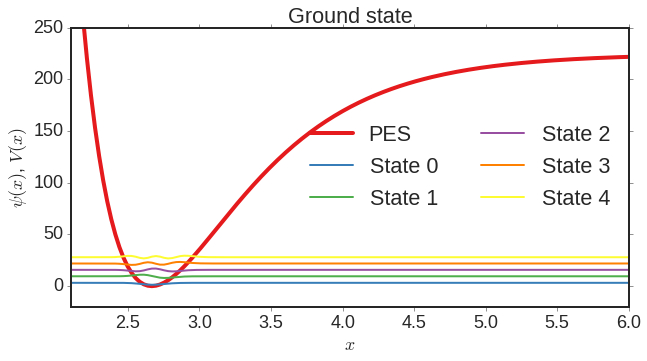

### <i class="fa fa-question-circle"></i>  Notice that the groundstate wavefunction is strictly negative here. <br> Is this an admissable wavefunction?<br>Why or why not?

**Place your answer here**



Now, let's go ahead and compute the lowest three vibrational eigenstates of the excited state PES using the same DVR code. Plot like before with the similar scaling and separation procedure. Adjust your plotting limits to see better.

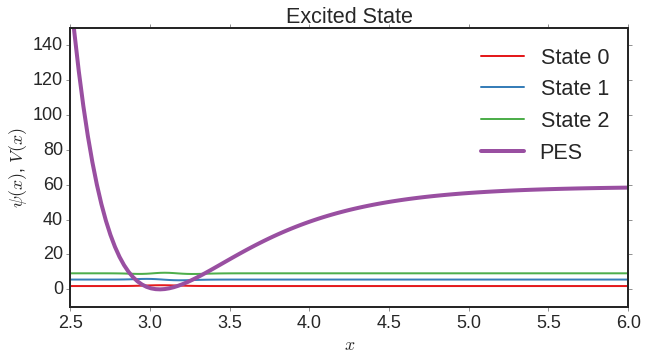

## 1.d - Comparing Morse and the HO
It's useful to compare the basin of the Morse potential with a basin from the harmonic oscillator, so that we can check the assumption that we made in class about the low lying vibrational states being well approximated by the harmonic oscillator. To do this, we will plot the harmonic oscillator basin inside the morse oscillator basin.

To do this, we'll want to use the formula:
$$ \frac{1}{2} k (r - r_e)^2 $$
where we will use the following parameters for the ground state:


* r_e = 2.6666 angstroms
* k = 1036.67801625 KJ/(mol angstrom^2)


and for the excited state PES:

* r_e = 3.061 angstroms 
* k = 370.476712149 KJ/(mol angstrom^2) 



In [8]:
def harmonic_pes_ground(x):
    '''
    This function takes in a scalar position value or an array of positions and returns the harmonic approximation to the groundstate
    potential energy surface with values derived from the spectroscopic parameters given in the textbox above. 
    ------------------------------------------------------
    INPUT
    r: Array of points to compute the PES on, given the parameters below
    ------------------------------------------------------
    OUTPUT
    returns an array with the potential energy surface on it
    '''

    return harmonic_ground_potential

def harmonic_pes_excited(x):
    '''
    This function takes in a scalar position value or an array of positions and returns the harmonic approximation to the excited state
    potential energy surface with values derived from the spectroscopic parameters given in the textbox above. 
    ------------------------------------------------------
    INPUT
    r: Array of points to compute the PES on, given the parameters below
    ------------------------------------------------------
    OUTPUT
    returns an array with the potential energy surface on it
    '''

    return harmonic_excited_potential

To complete the comparison, we will compare the eigenstates of the ground-state harmonic oscillator with those of the ground-state morse oscillator. To do this, use the same DVR code but with a different potential. We will then plot the first eigenstate of both the morse and harmonic oscillators on the same plot to compare. Do the same thing for the second, third, and twentieth eigenstates as well (four plots total).

**Note:** Also note the eigenstates are complex, so maybe the best way to visualize them is via their complex absolute values, good thing **numpy.abs** is smart enough to know when something is complex or real.

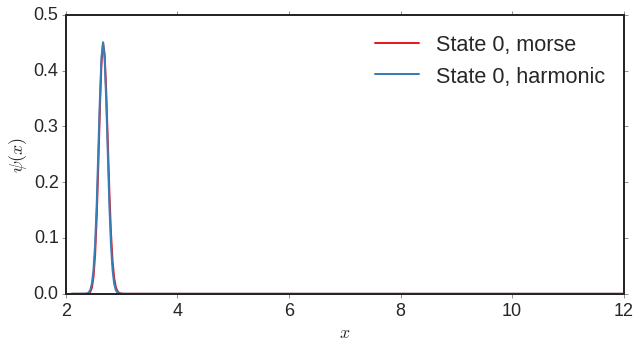

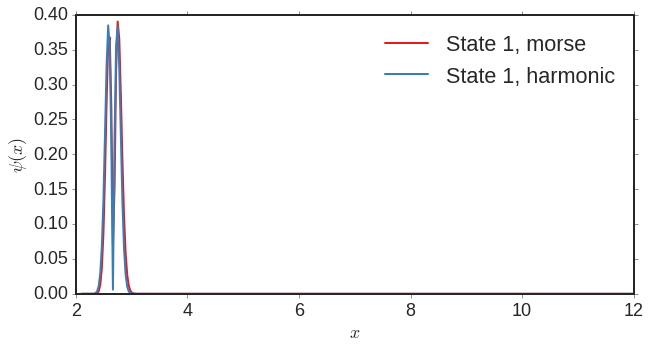

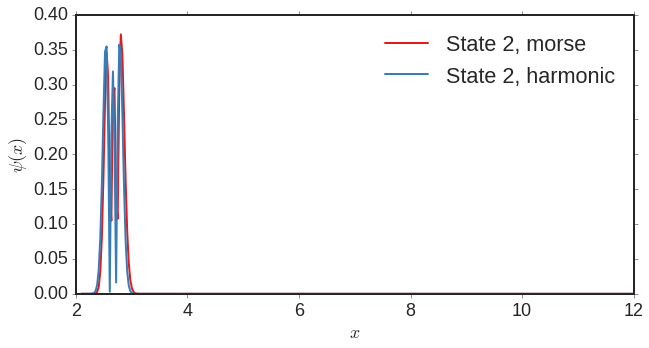

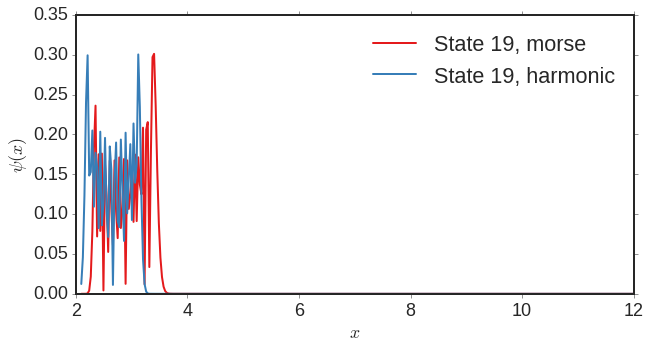

### <i class="fa fa-question-circle"></i>  How does the comparison hold up? <br>  What do you think about the harmonic approximation?<br>Where do you think it works? <br>And where does it break down?



**Put your answer here**


# <i class="fa fa-check-circle-o"></i> Exercise 2: <br> The Franck Condon Principle
## (1 point)

![Franck Condon Principle](files/Franck_Condon_Diagram.png)

## Franck–Condon principle energy diagram. 
Since electronic transitions are essentially instantaneous compared with nuclear motion, vibrational levels upon excitation with light correspond to a minimal change in the nuclear coordinates.  The potential wells are shown favoring transitions between v'' = 0 and v' = 2, since such a transtion can occur with minimal change in positions of the nuclei.

The Franck-Condon principle explains the intensity of vibronic transitions during an electronic transition. The principle states that during an electronic transition, the probability of transitioning from one vibrational energy level to another is proportional to the overlap of the two vibrational wave functions. This is to say that for a vertical excitation, the Franck-Condon factors can be expressed as:
$$ FCF = \left| \langle \psi^f | \psi_i \rangle \right|^2 =\left|\int \psi^*_f \psi_i dx \right|^2 = \left| \sum_i \psi^*_f(x_i) \psi_i(x_i) \right|^2 , $$
where $\psi_f$ is the wavefunction of the final vibrational state in the excited electronic PES, and $\psi_i$ is the wavefunction of the initial vibrational state in the ground state electronic PES.

**Note:** Since we are in a discrete space, integrals are really sumations and hence instead of using simps you can just code the summation formula. Checkout out **np.conjugate()**, **np.abs()**, **np.multiply()** and **np.vdot()** (np.dot for complex numbers). There are multiple ways of doing this.

## 2.a - Compute Frank-Condon factors

Compute the Franck-Condon factors for an excitation of the $I_2$ dimer from the lowest vibrational state (v''=0) in the ground state PES to the lowest ten vibrational states in the excited state PES (v'=0 to v'=9).
 We will be doing this for the morse oscillator PES.
 
### <i class="fa fa-question-circle"></i> <br>Which transition is most likely? least likely? <br> Does this match with what you'd expect?

**Put your answers here**


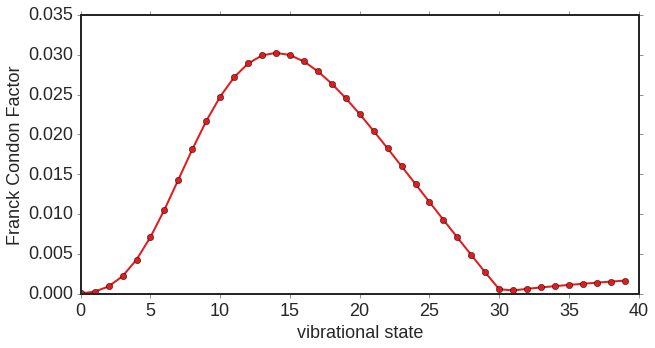

Next, let's make our own version of that Franck-Condon principle picture that is included up above.  

To do this, you'll simply need to plot both potentials on the same plot, taking care to shift the excited state one by the energy_gap.

**Note:** You may want to fine tune your xlim and ylim.
**Extra:** If you want to add colored wavepackets you can use : **plt.fill_between(x,y1,y2)**, with scaled psi as we did before.

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:4395: ComplexWarning: Casting complex values to real discards the imaginary part
  X[1:N + 1, 1] = y1slice


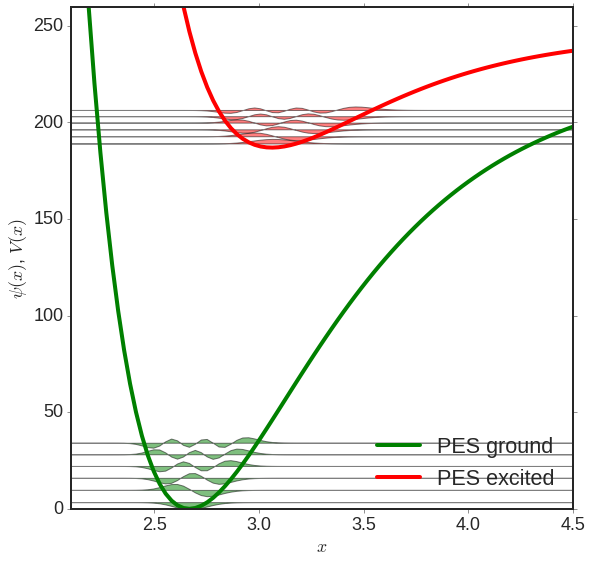

# <i class="fa fa-check-circle-o"></i> Exercise 3: <br> Wavepackets and Raman Spectroscopy
## (2 points)

In general, we are able to describe and characterize Raman excitations for polyatomic molecules with between 1 and 1000 degrees of freedom, which can include arbitrary translations, rotations, and vibrations using a time dependent picture. This picture was first derived by Professor Eric Heller, a professor here in the chemistry department, and has been an incredibly important theoretical technique for explaining, understanding, and predicting raman spectra.

The technique works within the Franck-Condon picture that we explored above. We start with a vibrational wavepacket on the ground-state potential energy surface:
![step1](files/step1.jpg)

It gets vertically excited by light to the excited-state potential energy surface:
![step2](files/step2.jpg)

and sloshes around in the excited-state potential energy surface:
![step3](files/step3.jpg)

As the wavepacket sloshes around, we want to compute its overlap with the initial wavepacket:
![step4](files/step4.jpg)

This sloshing around is what we understand as the inelastic scattering of the light.  This is the physical picture that you should keep in mind as we explore the equations that explain these dynamics.

Let's make this more precise. We know that our Raman cross section is going to be given by (http://pubs.acs.org/doi/abs/10.1021/ar00072a002):
$$\sigma(\omega_I) \propto\omega_I \omega_S^3 \left| \alpha_{fi} (\omega_I)  \right|^2 ,$$
where the Roman indices correspond to the electronic ground ($i$) and excited ($f$) states, $\omega_I$ is the incident frequency of light, $\omega_S$ is the emitted frequency of light, and $\alpha$ is the polarizability of the molecule.  Professor Heller worked out that using the time dependent picture, the polarizability could be calculated via:
$$ \alpha_{fi}(\omega_I) = \frac{i}{\hbar} \int_0^\infty \langle \phi_{f} | \phi_{i }(t) \rangle e^{i \omega_I t} dt ,$$
where $|\phi_{i} \rangle = \mu | \psi_i \rangle$, $|\phi_{f} \rangle = \mu | \psi_f \rangle$, and $|\phi_{i}(t) \rangle = e^{-i H_f t/\hbar} | \phi_i \rangle$.  As stated above, the way to interpret this is as follows: The initial state, $\psi_i$ is vertically excited by a pulse, $\mu$, and this is packaged together in $\phi_i$. This wavepacket then sloshes around on the excited PES. Initially, it will be in the Franck-Condon region, and therefore only have significant overlap with the initial $\psi_i$. As the wavepacket propagates forward in time, it moves in the excited-state PES, developing more and more overlap with the other vibrational modes of the ground-state PES.  Eventually, the wavepacket will reflect off the far side of the excited-state PES and move back towards the Franck-Condon region, developing a larger overlap with only the initial state.

This means that the equation for the polarization is the Fourier transform of the overlap of the final wavepacket with the initial wavepacket as a function of time. 

## 3.a - Prepare your wavepackets

The first thing that we're going to want to do is to solve the eigenvalue problem for the ground state potential surface. We'll do this in the same way as we did above. Then, we're going to want to use the ground vibrational state from that PES and use that as our initial wavepacket.

Next, go ahead and plot the PES and the initial wavepacket that you defined. We want to make sure that the initial wavepacket falls where it should in the PES.

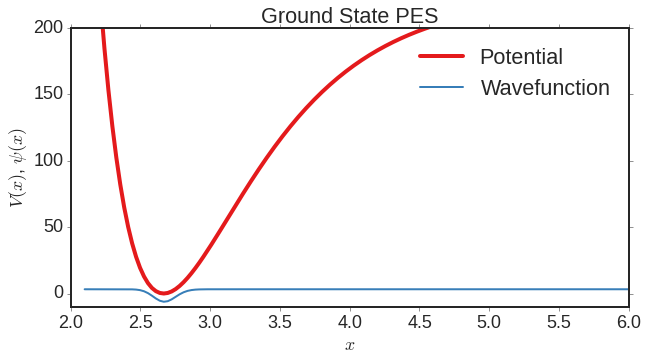

Then, we're going to want to do the same thing for the excited state PES. Just like before, solve the eigensystem and then plot the initial wavepacket against the excited state PES.
### <i class="fa fa-question-circle"></i> <br> Where does it fall? Does this make sense? <br> Which way do you think it will move?

**Put your answers here**

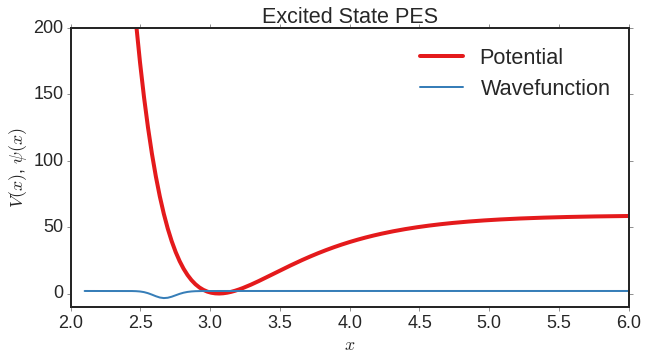

## 3.b - Setup your time-propagation
Next, let's define a time propagation routine. We'll write a function that propagates by explicitly including the phasors as we've seen in class. This means that we're going to have to take an initial wavepacket, $\phi$ and decompose it into excited PES vibrational eigenstates, $\left\{ \psi_i^e \right\}$, using the formula:
$$ \phi = \sum_i c_i \psi_i^e$$ where $c_i = \langle \psi_i^e | \phi \rangle $.

Note, because DVR returns a wavefunction on a grid, we can just use **np.vdot** to take the complex inner product.

This means that $\langle \psi_i^e | \phi \rangle  = \sum_n \psi_i^{e\; *}(x_n) \phi(x_n) $ = np.vdot($\psi_i^e$,$\phi$).

From there, we know that:
$$\phi(T) = \sum_i c_i e^{-i E_i T/\hbar} \psi_i^e.$$  

As an implementation note, we generally want to only use the lowest few states so limit numerical error and computational effort. I have gone ahead and figured out what the ideal truncation level is and called it NSTATES. Also, you're going to want to make sure to cast your next wavefunction as a complex valued vector.

While the formula allows for any arbitraty time $T$, in practice propagation is done in small timesteps $dt$ since these are more numerically stable, among other reasons.

You can do this via: **np.zeros_like(psi_prev, dtype=complex_ )**.

Finally, $\hbar$ has been defined in the correct unit system as HBAR. 

Please use it.

In [14]:
def time_step_explicit(psi_prev, Psi, E, dt):
    '''
    This function takes a vector with the previous wavefunction in it and steps
    it forward in time by dt.
    ------------------------------------------------------
    INPUT
    psi_prev: Vector that contains the previous wavepacket 
    that will be stepped forward.
    psi: The collection of eigenstates. You need to call psi[:, i-1]
    to call the ith eigenstate
    E: A vector that contains all the eigenenergies.E[i-1] is the ith eigenenergy
    dt: the time step
    ------------------------------------------------------
    OUTPUT
    psi: The wavepacket after it's been stepped forward by dt.
    '''
    psi = np.zeros_like(psi_prev, dtype = complex)

    return psi

Next, we want to define a function that will compute the correlation function by projecting the current wavepacket into the eigenstates of the ground state PES. This means that for the correlation function we're interested in:
$$ C_{f}(t) = \langle \phi(t) | \psi_f^g \rangle,$$
where $\phi(t)$ is the wavepacket propagating forward and $\psi_f^g$ is the f$^{th}$ eigenstate of the ground state potential energy surface.

In [15]:
def computeCF(psi, psi_g):
    '''
    This function takes a vector with the previous wavepacket
    and computes its overlap with each of the vibrational
    eigenstates in the ground PES.

    ------------------------------------------------------
    INPUT
    psi: Vector that contains the previous wavepacket
    that will be dotted into the eigenstates
    psi_g: The collection of groundPES vibrational eigenstates.
    ------------------------------------------------------
    OUTPUT
    cf: Vector that contains the overlap of psi with each of the eigenstates.
    '''
    cf = np.zeros(NSTATES,dtype=complex)

    return cf

## 3.c - <i class="fa fa-video-camera"></i> Time-propagation of $\Psi$!

Now that we have all of these functions defined, let's go ahead and actually propagate the wavepacket!

We'll want to keep track of the wavepacket at every time-step and precondition the propagation such that the first time step is given by our initial wave packet (**psi0**) using the following lines:
```python
psit = np.zeros((len(psi0), NTIME_STEPS), dtype = complex)
psit[:, 0] = psi0
```
We'll also want to keep track of the correlation function using:

```python
C = np.zeros((NSTATES, NTIME_STEPS))

```

This will allow us to keep track of the overlap of our wavepacket, $\psi$ with each of the ground PES eigenstates.

Also remember our time constants, they play a big role here!

```python
# Acelerate the time propagation
FAST_TIME=100 
# Number of timesteps to propagate the wave packet forward
NTIME_STEPS = int(80000/FAST_TIME) 
# time step in seconds
dt = 5e-17*FAST_TIME
# time grid to use for the wavepacket proagation
time = np.arange(0, NTIME_STEPS*dt, dt) 
# how much are we fast 
print("Simulating %d timesteps at a dt=%g s, for a total of %g s"%(
        NTIME_STEPS,dt,max(time))) 
```

Ultimately we can slow down or accelerate the simulation by changing **FAST_TIME**.

### Compute!

### Before animating... do a quick check
You can plot  $|\psi(x,t)|$ at different times (pick 5) and see if you are getting:

* Initial ground state
* Wavepacket moving around as a mixture of excited states ("sloshing around")
* Wavepacket coming back to it's inital position (might be hard to see)


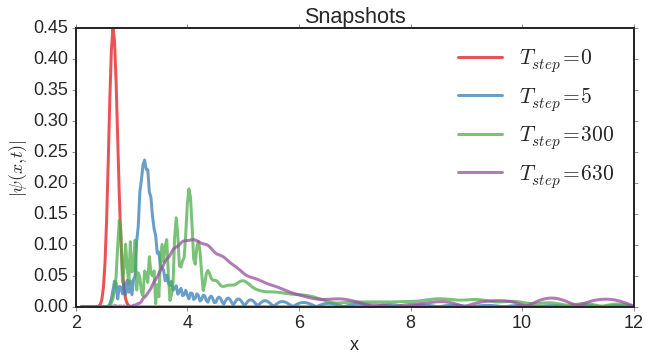

### Animate the propagation
You should also make an animation of your wavepacket as it's moving in the PES. Real and imaginary parts should be plotted.

#### Watch the movie, what do you see?

**Note:** You simulated 800, you probably might not want to use all these simulations steps, this would create a long animation ... if this is the case, you should use snapshots at different time steps for your movie based on how many frames you make (default is NFRAMES=800, 1 per time step).


In [18]:
NFRAMES=300
#We'll set up the figure for you
fig = plt.figure()
plt.xlim([min(x),max(x)])
plt.ylim([np.min(psit),np.max(psit)])
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
line, = plt.plot([],[], lw = 2,label='real') #line is a plot.... 
line2, = plt.plot([],[],  lw = 2,label='imag') #line is a plot.... 
plt.legend(loc='best')

def init():
    line.set_data(x, psi0.real) #sets the line data to nothing
    line2.set_data(x, psi0.imag) #sets the line data to nothing

    return line,  #return the line object

def animate(t):   
    #This is what you plot at each frame in the animation. 

    return line,line2

#Let's create the animation!!!
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=NFRAMES, blit=True)
#save the animation
qworld.embedAnimation(anim,plt)

/usr/local/lib/python2.7/dist-packages/matplotlib/transforms.py:979: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


### And the pdf ($|\psi(x,t)|^2)$!

In [19]:
NFRAMES=800
#We'll set up the figure for you
fig = plt.figure()
plt.xlim([min(x),max(x)])
absval=np.abs(psit)**2
plt.ylim([0,np.mean(absval)+4*np.std(absval) ])
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
line, = plt.plot([],[], lw = 2) #line is a plot.... 

def init():
    line.set_data(x, np.abs(psi0)**2) #sets the line data to nothing

    return line,  #return the line object

def animate(t):   

    #This is what you plot at each frame in the animation. 

    return line

#Let's create the animation!!!
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=NFRAMES, blit=True)
#save the animation
qworld.embedAnimation(anim,plt)

## Also check the overlaps of different states

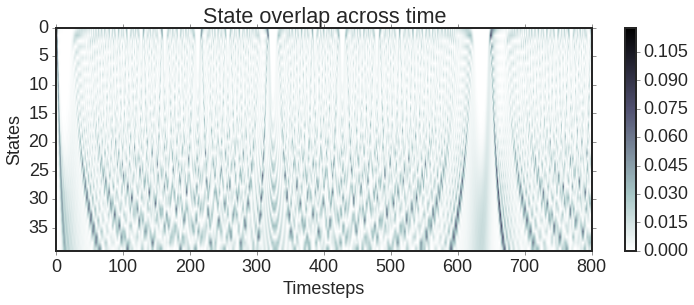

In [20]:
plt.figure(figsize=(12,4))
plt.imshow( np.abs(C)**2,
           cmap=plt.cm.bone_r,
           aspect='auto', extent=(0,len(time),NSTATES-1,0))
plt.ylabel('States')
plt.xlabel('Timesteps')
plt.title("State overlap across time")
plt.colorbar()
plt.show()

### and the state 0  correlation function ($|C_0(t)|^2$)

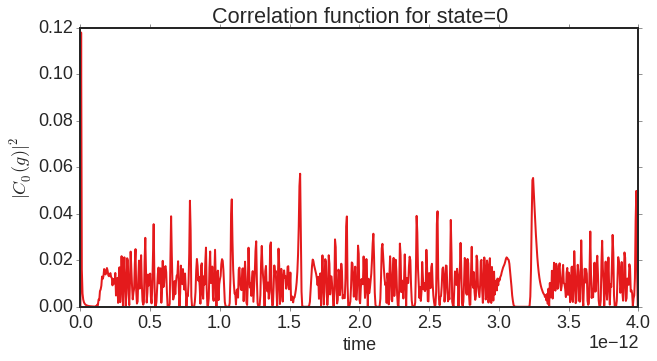

### <i class="fa fa-question-circle"></i> <br> Do thiese image relate to any events you see in the movie?<br> What is happening with the overlaps?<br> Is there a pattern?

** Answer me **

## 3.d - $I_2$ Spectrum

Finally, we will plot the raman spectrum!
As you may recall, for this we need to calculate the polarizability of the molecule as a function of frequency, recall:
$$\sigma(\omega_I) \propto\omega_I \omega_S^3 \left| \alpha_{fi} (\omega_I)  \right|^2 = \propto\omega_I  \left| \hat{ C_{fi}} (\omega_I)  \right|^2 $$
where $\hat{ C_{fi}} (\omega_I) $ is the fourier transform of the correlation function:
$$ \hat{ C_{fi}} (\omega_I) = \langle C_{fi}(t) | e^{i \omega_I t}  \rangle = \frac{i}{\hbar} \int_0^\infty \langle \phi_{f} | \phi_{i }(t) \rangle e^{i \omega_I t} dt $$

Since $\omega_S^3$ is a constant, it will only affect the amplitude of the spectrum so we will ignore it in our aproximation.

Luckily for you, we have the **chem160_fft()** function to perform the fourier tranform.
You can use it as a black box or you can read through it and ask questions.


In [22]:
def chem160_fft(signal):
    '''
    This function takes in a signal, computes the Fast Fourier Transform (fft),
    reorders it, and calculates the frequencies. Finally, it returns
    all of these values.
    ------------------------------------------------------
    INPUT
    signal: Vector containing the time signal to compute the fourier transform of.
    ------------------------------------------------------
    OUTPUT
    freq: An array of frequencies that are associated with the spectrum that was computed
    spectrum: The fourier transform of the inputted signal as a vector
    '''
    spectrum = np.fft.fftshift(np.fft.fft(signal))
    freq = np.fft.fftshift(np.fft.fftfreq(len(spectrum), d = dt)) # Freq in Hz
    freq *= 3.33565e-11 # Freq in cm^-1
    return freq, np.abs(spectrum)**2

### Calculate and plot that spectrum!

For each state, calculate it's fourier transform, sum them up, and then apply the frequency factor in our previous formula.

This should give you a nice spectrum.

**Note:** You will have a big range of values for frequencies, so you might want to use xlim to limit your graph to areas different than 0. And also use **semilogy()** instead of **plot** if your range of y values is very large.

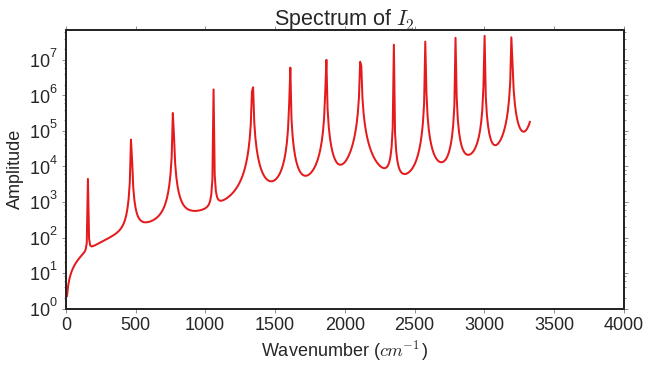

### <i class="fa fa-question-circle"></i> <br>What can you interpret from the graph? <br> Which frequencies have more energy?

Answer here